In [1]:
import pandas as pd
# Load the Titanic dataset
file_path = 'D3_Assignment1_Titanic.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Checking for missing values in the dataset
missing_data = titanic_data.isnull().sum()

# Displaying missing values in each column
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

ขั้นตอนการทำความสะอาดข้อมูล:
อายุ: เนื่องจากอายุเป็นตัวแปรที่สำคัญ เราจะใส่ค่าที่หายไป โดยอาจใช้ค่ามัธยฐานของอายุหรือใช้เทคนิคอื่นๆ เช่น การเติมข้อมูลตามจำนวนผู้โดยสารที่คล้ายคลึงกัน
ห้องโดยสาร: เนื่องจากมีค่าที่หายไปจำนวนมากในคอลัมน์ห้องโดยสาร เราอาจลบคอลัมน์นี้ออกจากการวิเคราะห์หรือสร้างหมวดหมู่ใหม่เพื่อแสดงค่าที่หายไป
ขึ้นเครื่องบิน: ด้วยค่าที่หายไปเพียง 2 ค่า เราสามารถใส่ค่าที่พบบ่อยที่สุดหรือลบ 2 แถวนี้ออก

In [3]:
# Impute missing Age values with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Impute missing Embarked values with the most common port of embarkation
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# For Cabin, we'll create a new category 'Unknown' for missing values
titanic_data['Cabin'].fillna('Unknown', inplace=True)

# Verify that there are no more missing values
cleaned_data_missing = titanic_data.isnull().sum()

cleaned_data_missing

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

ข้อมูลได้รับการทำความสะอาดเรียบร้อยแล้ว โดยไม่มีค่าที่หายไปเหลืออยู่ ตอนนี้ ฉันจะทำการวิเคราะห์ข้อมูลเชิงสำรวจ (EDA) เพื่อทำความเข้าใจความสัมพันธ์ระหว่างพารามิเตอร์ต่างๆ และอัตราการรอดชีวิตของผู้โดยสาร ซึ่งจะเกี่ยวข้องกับ:

อัตราการรอดชีวิตตามชั้นโดยสาร (Pclass)
อัตราการรอดชีวิตตามเพศ
อัตราการรอดชีวิตตามอายุ
อัตราการรอดชีวิตตามจำนวนพี่น้อง/คู่สมรส (SibSp)
อัตราการรอดชีวิตตามจำนวนพ่อแม่/บุตร (Parch)
อัตราการรอดชีวิตตามค่าโดยสาร
อัตราการรอดชีวิตตามท่าเรือที่ขึ้นเครื่อง (ขึ้นเครื่องแล้ว)

C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\2546748825.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\2546748825.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_data, ci=None)


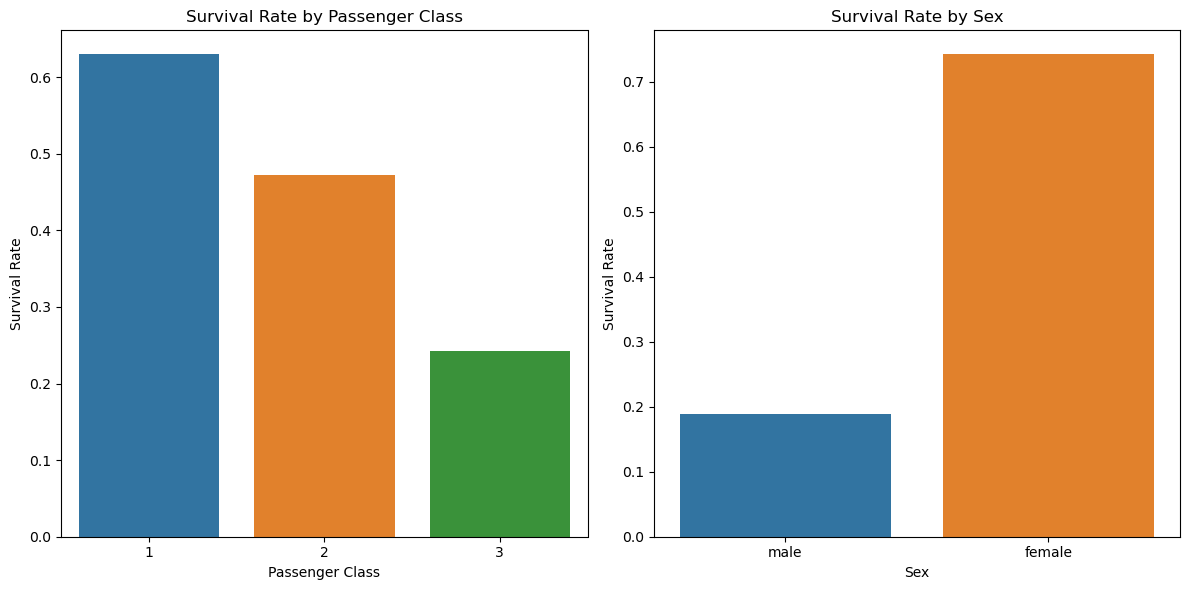

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Survival rate by Passenger Class
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')

# Survival rate by Sex
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')

# Display the plots
plt.tight_layout()
plt.show()

ข้อมูลเชิงลึกจากภาพจำลอง:
อัตราการรอดชีวิตตามชั้นโดยสาร:

ผู้โดยสารในชั้น 1 มีอัตราการรอดชีวิตสูงสุด รองลงมาคือผู้โดยสารในชั้น 2 ส่วนผู้โดยสารชั้น 3 มีอัตราการรอดชีวิตต่ำสุด
ซึ่งแสดงให้เห็นว่าสถานะทางเศรษฐกิจและสังคมตามชั้นโดยสารมีอิทธิพลอย่างมากต่อโอกาสในการรอดชีวิต
อัตราการรอดชีวิตตามเพศ:

ผู้โดยสารหญิงมีอัตราการรอดชีวิตสูงกว่าผู้โดยสารชายมาก
ซึ่งบ่งชี้ว่าเพศมีบทบาทสำคัญในการกำหนดอัตราการรอดชีวิต ซึ่งอาจเป็นเพราะนโยบาย "ผู้หญิงและเด็กมาก่อน" ในระหว่างการอพยพ

C:\Users\pooh-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pooh-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


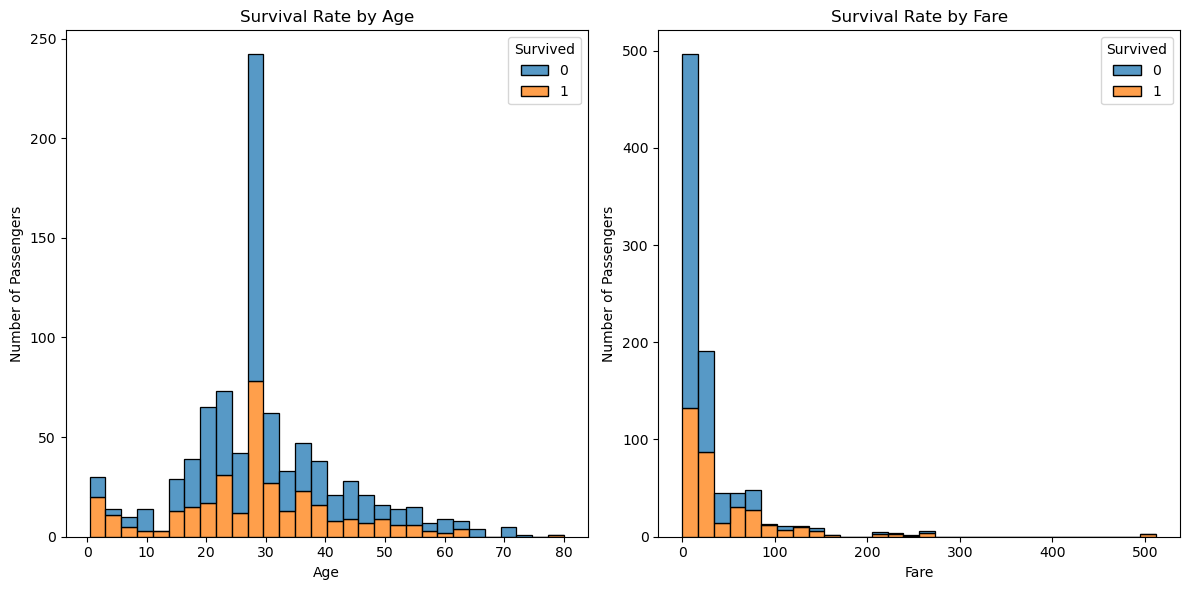

In [5]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Survival rate by Age
plt.subplot(1, 2, 1)
sns.histplot(titanic_data, x='Age', hue='Survived', multiple='stack', kde=False, bins=30)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

# Survival rate by Fare
plt.subplot(1, 2, 2)
sns.histplot(titanic_data, x='Fare', hue='Survived', multiple='stack', kde=False, bins=30)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

# Display the plots
plt.tight_layout()
plt.show()

อัตราการรอดชีวิตตามอายุ:
ผู้โดยสารที่อายุน้อย โดยเฉพาะเด็ก มีโอกาสรอดชีวิตสูงกว่าผู้โดยสารที่มีอายุมากกว่า
ซึ่งเป็นการตอกย้ำนโยบาย "ผู้หญิงและเด็กมาก่อน" ในระหว่างการอพยพ โดยเด็กจะได้รับความสำคัญเป็นอันดับแรก

อัตราการรอดชีวิตตามค่าโดยสาร:
ผู้โดยสารที่จ่ายค่าโดยสารแพงกว่ามีอัตราการรอดชีวิตสูงกว่า
ซึ่งสอดคล้องกับการค้นพบก่อนหน้านี้ที่ระบุว่าผู้โดยสารในชั้น 1 ซึ่งน่าจะจ่ายค่าโดยสารแพงกว่า มีโอกาสรอดชีวิตมากกว่า

C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\2163102536.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=titanic_data, ci=None)
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\2163102536.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=titanic_data, ci=None)
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\2163102536.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic_data, ci=None)


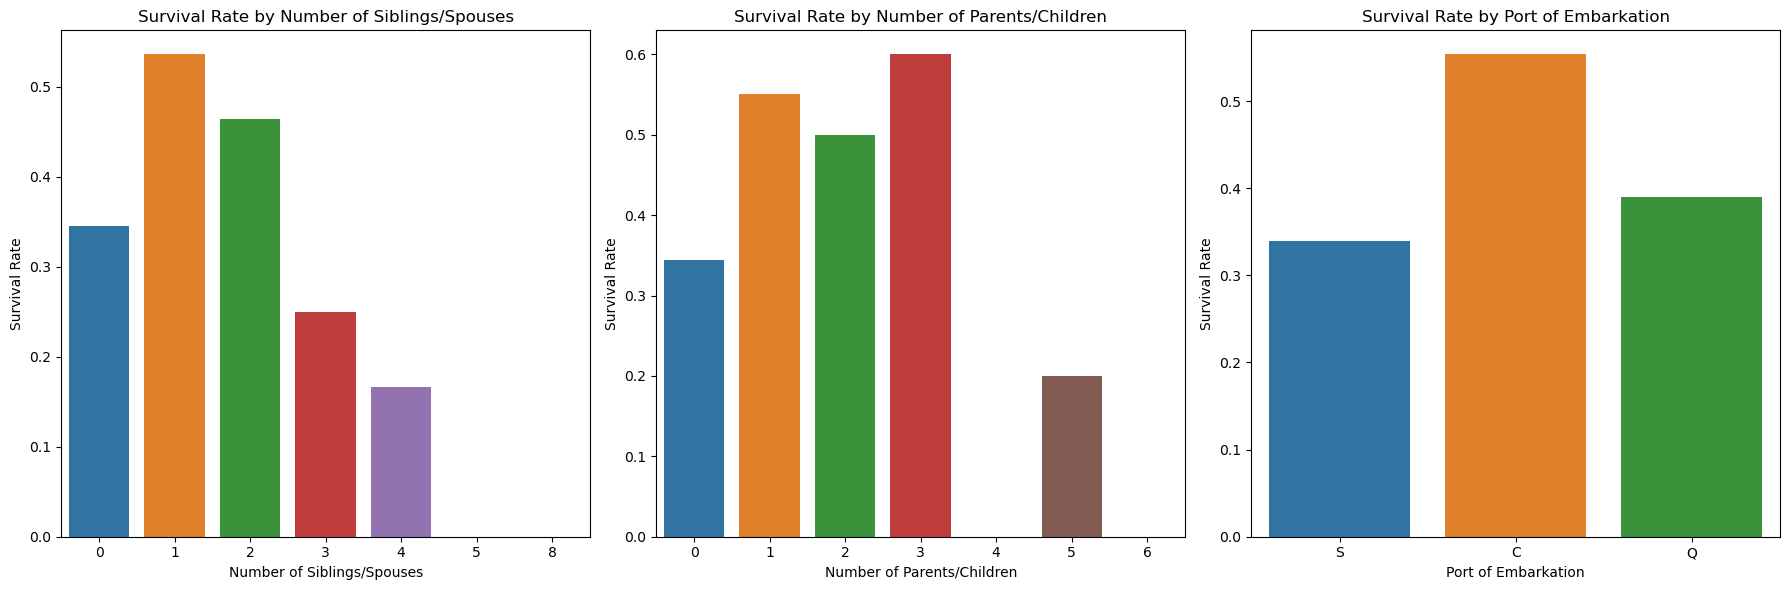

In [6]:
# Set up the figure
plt.figure(figsize=(18, 6))

# Survival rate by SibSp
plt.subplot(1, 3, 1)
sns.barplot(x='SibSp', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.xlabel('Number of Siblings/Spouses')

# Survival rate by Parch
plt.subplot(1, 3, 2)
sns.barplot(x='Parch', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.xlabel('Number of Parents/Children')

# Survival rate by Embarked
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=titanic_data, ci=None)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation')

# Display the plots
plt.tight_layout()
plt.show()

ข้อมูลเชิงลึกจากภาพจำลอง:
อัตราการรอดชีวิตตามจำนวนพี่น้อง/คู่สมรส (SibSp):
ผู้โดยสารที่มีพี่น้องหรือคู่สมรส 1-2 คนบนเรือมีอัตราการรอดชีวิตสูงกว่าผู้โดยสารที่ไม่มีพี่น้องหรือมีพี่น้อง/คู่สมรสหลายคน
ซึ่งแสดงให้เห็นว่าการมีครอบครัวเล็กๆ อาจเป็นประโยชน์ต่อการอยู่รอด

อัตราการรอดชีวิตตามจำนวนพ่อแม่/บุตร (Parch):
เช่นเดียวกับตัวแปร SibSp ผู้โดยสารที่มีพ่อแม่หรือบุตร 1-3 คนบนเรือมีโอกาสรอดชีวิตมากกว่า
อย่างไรก็ตาม อัตราการรอดชีวิตลดลงสำหรับผู้โดยสารที่มีผู้ติดตามมากขึ้น ซึ่งอาจเป็นเพราะความท้าทายในการจัดการกับกลุ่มครอบครัวที่ใหญ่ขึ้นในระหว่างการอพยพ

อัตราการรอดชีวิตตามท่าเรือที่ขึ้นเรือ (ขึ้นเรือ):
ผู้โดยสารที่ขึ้นเรือที่เชอร์บูร์ก (C) มีอัตราการรอดชีวิตสูงสุด รองลงมาคือผู้โดยสารจากเซาแธมป์ตัน (S) ส่วนผู้โดยสารจากควีนส์ทาวน์ (Q) มีอัตราการรอดชีวิตต่ำที่สุด
ซึ่งอาจสะท้อนถึงการกระจายตัวของผู้โดยสารตามชั้นโดยสารที่จุดขึ้นเรือต่างๆ


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert categorical variables into numeric format
titanic_data_encoded = titanic_data.copy()
titanic_data_encoded['Sex'] = LabelEncoder().fit_transform(titanic_data_encoded['Sex'])
titanic_data_encoded = pd.get_dummies(titanic_data_encoded, columns=['Embarked'], drop_first=True)

# Selecting relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = titanic_data_encoded[features]
y = titanic_data_encoded['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting the survival on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

accuracy, classification_rep, roc_auc, (fpr, tpr)


(0.8100558659217877,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n',
 0.881981981981982,
 (array([0.        , 0.        , 0.        , 0.01904762, 0.01904762,
         0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.04761905,
         0.04761905, 0.07619048, 0.07619048, 0.08571429, 0.08571429,
         0.1047619 , 0.1047619 , 0.11428571, 0.11428571, 0.14285714,
         0.14285714, 0.16190476, 0.16190476, 0.17142857, 0.17142857,
         0.19047619, 0.19047619, 0.2       , 0.2       , 0.21904762,
         0.21904762, 0.27619048, 0.27619048, 0.31428571, 0.31428571,
         0.37142857, 0.37142857, 0.48571429, 0.48571429, 0.5047619 ,
         0.5047619 , 0.54285714, 0.56190476, 0.71428571, 0.71428571,

ผลการประเมินแบบจำลอง:
ความแม่นยำ: แบบจำลองมีความแม่นยำ 81.01% ในชุดทดสอบ ซึ่งบ่งชี้ว่าคำทำนายที่ทำโดยแบบจำลองนั้นถูกต้องประมาณ 81%

รายงานการจำแนกประเภท:
ความแม่นยำ: ความแม่นยำสำหรับคลาส "รอดชีวิต" (1) คือ 0.79 ซึ่งหมายความว่าเมื่อแบบจำลองทำนายการรอดชีวิต แบบจำลองจะทำนายได้ถูกต้อง 79% ของเวลาทั้งหมด
การเรียกคืน: การเรียกคืนสำหรับคลาส "รอดชีวิต" คือ 0.74 ซึ่งบ่งชี้ว่าแบบจำลองระบุผู้รอดชีวิตจริงได้ถูกต้อง 74%
คะแนน F1: คะแนน F1 ซึ่งเป็นค่าเฉลี่ยฮาร์มอนิกของความแม่นยำและการเรียกคืนคือ 0.76 สำหรับคลาส "รอดชีวิต"
คะแนน ROC-AUC: คะแนน ROC-AUC คือ 0.88 ซึ่งเป็นตัวบ่งชี้ที่ดีว่าแบบจำลองสามารถแยกแยะระหว่างคลาสต่างๆ (รอดชีวิตกับไม่รอดชีวิต) ได้ดีเพียงใด

กราฟ ROC: กราฟ ROC แสดงให้เห็นถึงการแลกเปลี่ยนระหว่างอัตราผลบวกที่แท้จริง (ความไว) และอัตราผลบวกปลอม โมเดลที่มีการจำแนกประเภทที่สมบูรณ์แบบจะมีกราฟที่ตามขอบด้านซ้ายมือแล้วจึงตามขอบด้านบนของพื้นที่ ROC

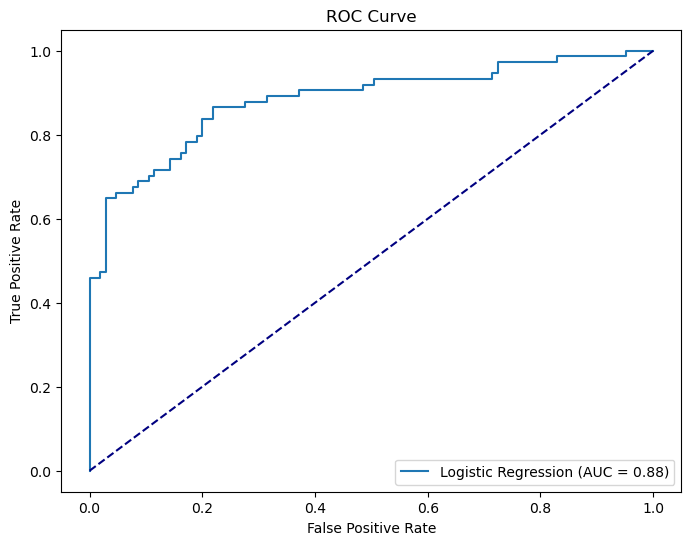

In [8]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


การตีความกราฟ ROC:
กราฟ ROC ที่วาดขึ้นแสดงให้เห็นถึงประสิทธิภาพที่ดีของแบบจำลองการถดถอยแบบลอจิสติกส์ พื้นที่ใต้กราฟ (AUC) อยู่ที่ 0.88 ซึ่งบ่งชี้ว่าแบบจำลองมีความสามารถสูงในการแยกแยะระหว่างผู้โดยสารที่รอดชีวิตและผู้โดยสารที่ไม่รอดชีวิต

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicting the survival on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)

# Feature importance
feature_importances_rf = rf_model.feature_importances_

accuracy_rf, classification_rep_rf, roc_auc_rf, (fpr_rf, tpr_rf), feature_importances_rf


(0.8100558659217877,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.84       105\n           1       0.79      0.74      0.76        74\n\n    accuracy                           0.81       179\n   macro avg       0.81      0.80      0.80       179\nweighted avg       0.81      0.81      0.81       179\n',
 0.8878378378378379,
 (array([0.        , 0.        , 0.        , 0.00952381, 0.02857143,
         0.02857143, 0.03809524, 0.03809524, 0.03809524, 0.03809524,
         0.03809524, 0.03809524, 0.03809524, 0.03809524, 0.03809524,
         0.03809524, 0.05714286, 0.05714286, 0.07619048, 0.08571429,
         0.08571429, 0.0952381 , 0.0952381 , 0.1047619 , 0.12380952,
         0.12380952, 0.14285714, 0.15238095, 0.16190476, 0.16190476,
         0.17142857, 0.17142857, 0.19047619, 0.22857143, 0.22857143,
         0.24761905, 0.24761905, 0.28571429, 0.2952381 , 0.2952381 ,
         0.32380952, 0.32380952, 0.34285714, 0.34285714, 0.37142857

ผลการประเมินแบบจำลอง Random Forest:
ความแม่นยำ: แบบจำลอง Random Forest มีความแม่นยำ 81.01% ซึ่งเท่ากับแบบจำลองการถดถอยแบบลอจิสติกส์

รายงานการจำแนกประเภท:

ความแม่นยำ: ความแม่นยำสำหรับคลาส "รอดชีวิต" (1) คือ 0.79 ซึ่งสอดคล้องกับแบบจำลองการถดถอยแบบลอจิสติกส์
การเรียกคืน: การเรียกคืนสำหรับคลาส "รอดชีวิต" คือ 0.74 ซึ่งตรงกับผลการถดถอยแบบลอจิสติกส์อีกครั้ง
คะแนน F1: คะแนน F1 สำหรับคลาส "รอดชีวิต" คือ 0.76
คะแนน ROC-AUC: คะแนน ROC-AUC สำหรับแบบจำลอง Random Forest คือ 0.89 ซึ่งสูงกว่าแบบจำลองการถดถอยแบบลอจิสติกส์เล็กน้อย ซึ่งบ่งชี้ถึงความสามารถที่ดีขึ้นเล็กน้อยในการแยกแยะระหว่างผู้รอดชีวิตและผู้ไม่รอดชีวิต

ความสำคัญของคุณลักษณะ:

คุณลักษณะที่สำคัญที่สุดในการคาดการณ์การอยู่รอด ได้แก่:
อัตราค่าโดยสาร (27.92%)
เพศ (26.70%)
อายุ (24.94%)
ชั้นโดยสาร (8.10%)
คุณลักษณะอื่นๆ มีความสำคัญน้อยกว่าแต่ยังคงส่งผลต่อแบบจำลอง

C:\Users\pooh-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


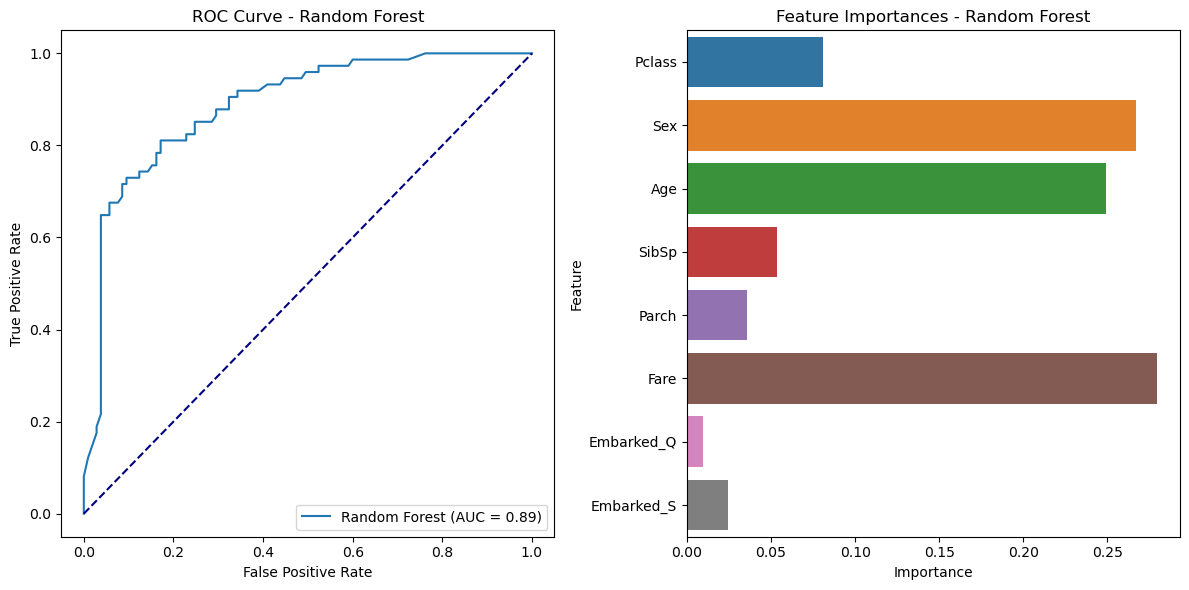

In [10]:
# Plotting the ROC curve for the Random Forest model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')

# Plotting the feature importances
plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_rf, y=features)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


กราฟ ROC:
กราฟ ROC สำหรับแบบจำลอง Random Forest ดีกว่าของแบบจำลองการถดถอยแบบลอจิสติกเล็กน้อย โดยมีค่า AUC เท่ากับ 0.89 ซึ่งบ่งชี้ถึงความสามารถที่แข็งแกร่งในการแยกแยะระหว่างผู้รอดชีวิตและผู้ไม่รอดชีวิต

ความสำคัญของคุณลักษณะ:
ค่าโดยสาร เพศ และอายุเป็นคุณลักษณะที่สำคัญที่สุดในการคาดการณ์การรอดชีวิตตามแบบจำลอง Random Forest ซึ่งสอดคล้องกับความเข้าใจทั่วไปเกี่ยวกับปัจจัยที่มีอิทธิพลต่อการรอดชีวิตระหว่างภัยพิบัติเรือไททานิก

In [20]:
# Splitting the data by class
class_1 = titanic_data[titanic_data['Pclass'] == 1]
class_2 = titanic_data[titanic_data['Pclass'] == 2]
class_3 = titanic_data[titanic_data['Pclass'] == 3]

# Function to calculate survival rate by gender and age group
def survival_rate_by_gender_and_age(data):
    # Survival rate by gender
    survival_by_gender = data.groupby('Sex')['Survived'].mean()
    
    # Define age groups
    bins = [0, 12, 18, 50, 100]
    labels = ['Child', 'Teenager', 'Adult', 'Senior']
    data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
    
    # Survival rate by age group
    survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
    
    return survival_by_gender, survival_by_age_group

# Calculate survival rates for each class
survival_class_1 = survival_rate_by_gender_and_age(class_1)
survival_class_2 = survival_rate_by_gender_and_age(class_2)
survival_class_3 = survival_rate_by_gender_and_age(class_3)

survival_class_1, survival_class_2, survival_class_3


C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\393152720.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\393152720.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\393152720.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

((Sex
  female    0.968085
  male      0.368852
  Name: Survived, dtype: float64,
  AgeGroup
  Child       0.750000
  Teenager    0.916667
  Adult       0.645963
  Senior      0.461538
  Name: Survived, dtype: float64),
 (Sex
  female    0.921053
  male      0.157407
  Name: Survived, dtype: float64,
  AgeGroup
  Child       1.000000
  Teenager    0.500000
  Adult       0.435714
  Senior      0.200000
  Name: Survived, dtype: float64),
 (Sex
  female    0.500000
  male      0.135447
  Name: Survived, dtype: float64,
  AgeGroup
  Child       0.416667
  Teenager    0.282609
  Adult       0.219638
  Senior      0.100000
  Name: Survived, dtype: float64))

In [21]:
import pandas as pd

# Assume titanic_data is your DataFrame

# Split data by class
class_1 = titanic_data[titanic_data['Pclass'] == 1]
class_2 = titanic_data[titanic_data['Pclass'] == 2]
class_3 = titanic_data[titanic_data['Pclass'] == 3]

# Function to calculate survival rate by gender and age group
def survival_rate_by_gender_and_age(data):
    # Survival rate by gender
    survival_by_gender = data.groupby('Sex')['Survived'].mean()
    
    # Define age groups
    bins = [0, 12, 18, 50, 100]
    labels = ['Child', 'Teenager', 'Adult', 'Senior']
    data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
    
    # Survival rate by age group
    survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
    
    return survival_by_gender, survival_by_age_group

# Calculate survival rates for each class
survival_class_1 = survival_rate_by_gender_and_age(class_1)
survival_class_2 = survival_rate_by_gender_and_age(class_2)
survival_class_3 = survival_rate_by_gender_and_age(class_3)

print("Class 1 Survival Rates")
print(survival_class_1)
print("\nClass 2 Survival Rates")
print(survival_class_2)
print("\nClass 3 Survival Rates")
print(survival_class_3)


Class 1 Survival Rates
(Sex
female    0.968085
male      0.368852
Name: Survived, dtype: float64, AgeGroup
Child       0.750000
Teenager    0.916667
Adult       0.645963
Senior      0.461538
Name: Survived, dtype: float64)

Class 2 Survival Rates
(Sex
female    0.921053
male      0.157407
Name: Survived, dtype: float64, AgeGroup
Child       1.000000
Teenager    0.500000
Adult       0.435714
Senior      0.200000
Name: Survived, dtype: float64)

Class 3 Survival Rates
(Sex
female    0.500000
male      0.135447
Name: Survived, dtype: float64, AgeGroup
Child       0.416667
Teenager    0.282609
Adult       0.219638
Senior      0.100000
Name: Survived, dtype: float64)


C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\112543224.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\112543224.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
C:\Users\pooh-\AppData\Local\Temp\ipykernel_11268\112543224.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu